<center>
    <div style="font-family: 'broadway', serif; font-size: 40px; font-weight: bold; color: white;
                letter-spacing: 1.2px; text-transform: capitalize; 
                background: linear-gradient(to right, black, purple); 
                -webkit-background-clip: text; 
                -webkit-text-fill-color: transparent; 
                border: 0px solid #00aaff; 
                border-radius: 10px; 
                padding: 12px 25px; 
                display: inline-block; 
                box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.2);">
       ZULLY COLLECTIONS ANALYSIS
    </div>
</center>


<div style="text-align: justify; font-size: 20px; color: PURPLE; font-family: Garamond; font-weight: bold">
    INTRODUCTION TO THE PROJECT:
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    The project aims to analyze customer transactions and performance metrics to derive actionable insights for improving revenue, delivery efficiency, and customer satisfaction. By understanding trends in sales, returns, delivery performance, and acquisition methods, we aim to:

- Identify top-performing products and regions.
- Evaluate customer satisfaction and its driving factors.
- Analyze delivery performance's impact on business metrics.
- Provide recommendations to optimize business operations.
</div>

<div style="text-align: justify; font-size: 20px; color: PURPLE; font-family: Garamond; font-weight: bold">
   IMPORTING LIBRARIES AND DATA FRAME:
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    we begin by importing the necessary Python libraries and loading the dataset into a pandas DataFrame for analysis.
</div>

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:/Users/HP/OneDrive/Documents/PYTHON/PORTFOLIO/EXCEL/zully.xlsx")

df.head()

,Date,Customer Acquisition Type,State,Product,Price,Units,Revenue,Delivery Performance,Return,Customer Satisfaction
0,2017-01-01,Ad,Florida,Product 2,199,4,796,on-time,no,(2) low
1,2017-01-01,Returning,North Carolina,Product 3,299,9,2691,on-time,no,(1) very low
2,2017-01-02,Organic,Mississippi,Product 2,199,6,1194,on-time,no,(3) ok
3,2017-01-03,Organic,Florida,Product 4,99,3,297,delayed,no,(2) low
4,2017-01-03,Returning,Mississippi,Product 2,199,7,1393,on-time,no,(3) ok


<div style="text-align: justify; font-size: 20px; color: purple; font-family: Garamond; font-weight: bold">
   DATA PREPOROCESSING:
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    Before diving into the analysis, we need to prepare the dataset by performing the following tasks: <br>
1. Check for missing values and decide how to handle them. <br>
2. Ensuring proper data types for numerical and categorical columns. <br>
3. Add new columns to facilitate analysis. <br>

In [177]:
#column and  row details
print("\n")
print(df.info())

#basic statistics
print("\n")
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       5780 non-null   datetime64[ns]
 1   Customer Acquisition Type  5780 non-null   object        
 2   State                      5780 non-null   object        
 3   Product                    5780 non-null   object        
 4   Price                      5780 non-null   int64         
 5   Units                      5780 non-null   int64         
 6   Revenue                    5780 non-null   int64         
 7   Delivery Performance       5780 non-null   object        
 8   Return                     5780 non-null   object        
 9   Customer Satisfaction      5780 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 451.7+ KB
None




,Date,Price,Units,Revenue
count,5780,5780.000000,5780.000000,5780.000000
mean,2018-06-15 04:21:35.501730304,300.089965,5.489965,1658.454671
min,2017-01-01 00:00:00,99.000000,1.000000,99.000000
25%,2017-09-22 00:00:00,199.000000,3.000000,598.000000
50%,2018-05-18 00:00:00,299.000000,5.000000,1393.000000
75%,2019-03-12 00:00:00,399.000000,8.000000,2394.000000
max,2019-12-31 00:00:00,499.000000,10.000000,4990.000000
std,NaN,141.153833,2.861890,1248.018521


In [178]:
#check for duplicates
df.duplicated().sum()

2

In [179]:
# Drop duplicates
df = df.drop_duplicates(keep='first')

#Check again
df.duplicated().sum()

0

In [180]:
#Adding new columns

#Average price per unit : (revenue / units)
df['avg_price'] = df['Revenue'] / df['Units']

#Customer satisfaction: 
## Extracting the numeric part from Customer Satisfaction
df['Customer Satisfaction Score'] = df['Customer Satisfaction'].str.extract(r'\((\d+)\)').astype(int)

df['satisfaction_level'] = pd.cut(
    df['Customer Satisfaction Score'], 
    bins=[0, 2, 4, 5], 
    labels=['Low', 'Medium', 'High']
)

# Check our columns to see newly added columns
df.head()

,Date,Customer Acquisition Type,State,Product,Price,Units,Revenue,Delivery Performance,Return,Customer Satisfaction,avg_price,Customer Satisfaction Score,satisfaction_level
0,2017-01-01,Ad,Florida,Product 2,199,4,796,on-time,no,(2) low,199.0,2,Low
1,2017-01-01,Returning,North Carolina,Product 3,299,9,2691,on-time,no,(1) very low,299.0,1,Low
2,2017-01-02,Organic,Mississippi,Product 2,199,6,1194,on-time,no,(3) ok,199.0,3,Medium
3,2017-01-03,Organic,Florida,Product 4,99,3,297,delayed,no,(2) low,99.0,2,Low
4,2017-01-03,Returning,Mississippi,Product 2,199,7,1393,on-time,no,(3) ok,199.0,3,Medium


<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    From the tables, we can see that we do not have any null cell as Range correlates with the number of non-null rows across the dataset. Columns are equally in their correct datatype format including the Transaction date column which is in datetime. We can also see the basic statistics for the numerical columns. We discovered 2 duplicates which we dropped. Also, we added two columns to aid our analysis.
</div>

<div style="text-align: justify; font-size: 20px; color: purple; font-family: Garamond; font-weight: bold">
   EXPLORATORY DATA ANALYSIS
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    We will explore the data to uncover patterns and trends in the dataset. Summarize statistics for numeric and categorical columns. Plot distribution of key metrics (e.g., price, revenue, customer_satisfaction).

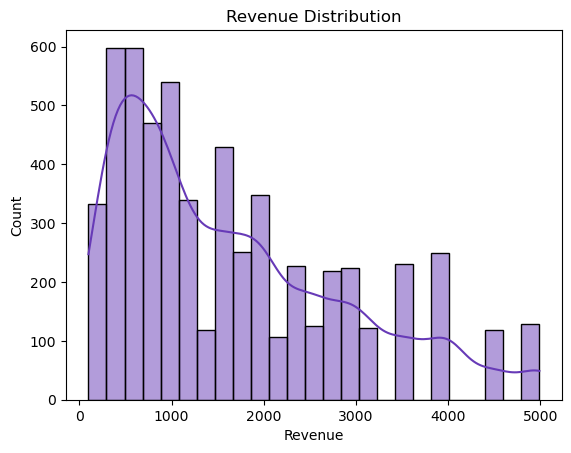

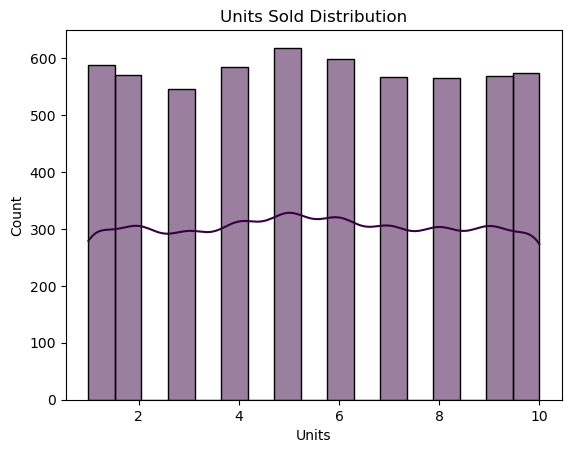

In [188]:
#Distribution of Revenue and Units Sold
sns.histplot(df['Revenue'], kde=True, color='#673AB7')
plt.title('Revenue Distribution')
plt.show()

sns.histplot(df['Units'], kde=True, color='#36013F')
plt.title('Units Sold Distribution')
plt.show()

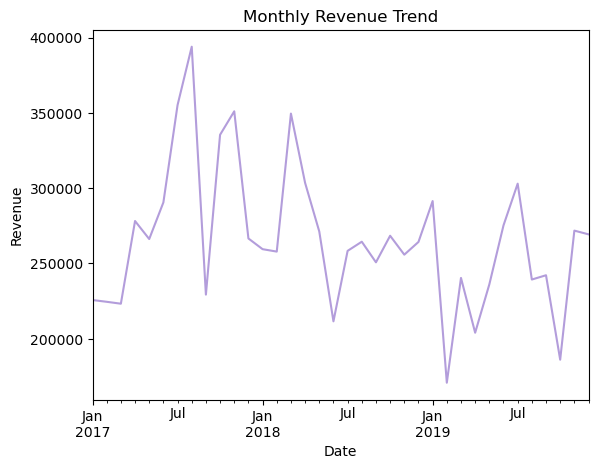

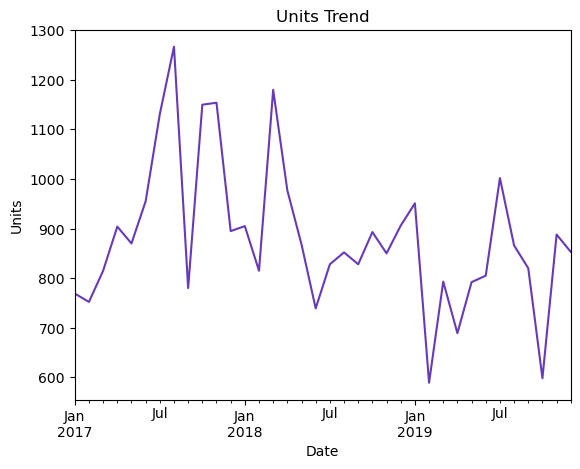

In [189]:
#Key Trends
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', color='#B39DDB')
plt.ylabel('Revenue')
plt.show()

monthly_units = df.groupby(df['Date'].dt.to_period('M'))['Units'].sum()
monthly_units.plot(kind='line', title='Units Trend', color='#673AB7')
plt.ylabel('Units')
plt.show()

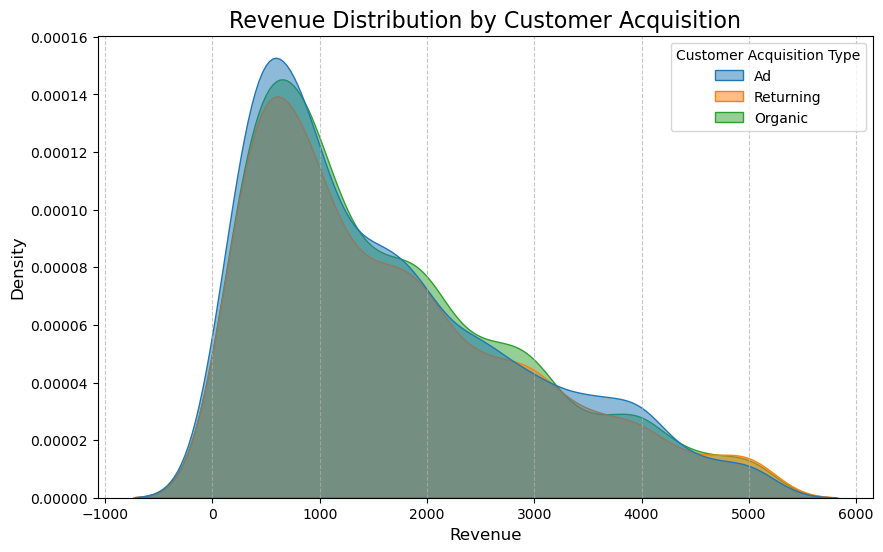

In [190]:
#Relationships between Distribution of Customer Acquisition types
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Revenue", hue="Customer Acquisition Type", fill=True, alpha=0.5)
plt.title("Revenue Distribution by Customer Acquisition", fontsize=16)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

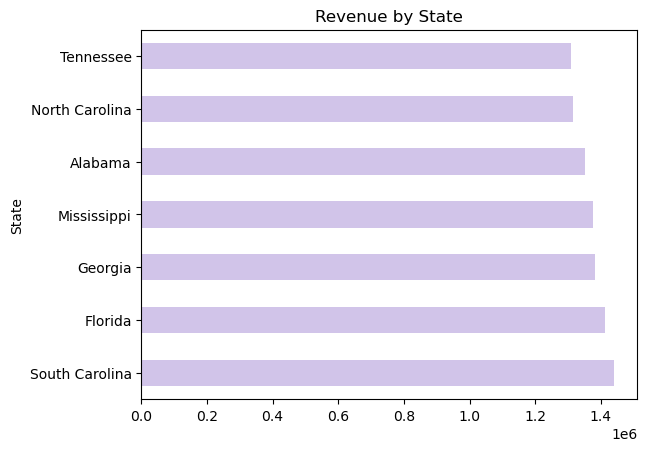

In [192]:
#comparison of revenue and satisfaction
state_performance = df.groupby('State').agg({'Revenue': 'sum', 'Customer Satisfaction Score': 'mean'})
state_performance = state_performance.sort_values('Revenue', ascending=False)
state_performance['Revenue'].plot(kind='barh', title='Revenue by State', color='#D1C4E9')
plt.show()


<div style="text-align: justify; font-size: 20px; color: purple; font-family: Garamond; font-weight: bold">
   ANALYSIS
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    Analysing the data to bring out information to aid decision making
</div>

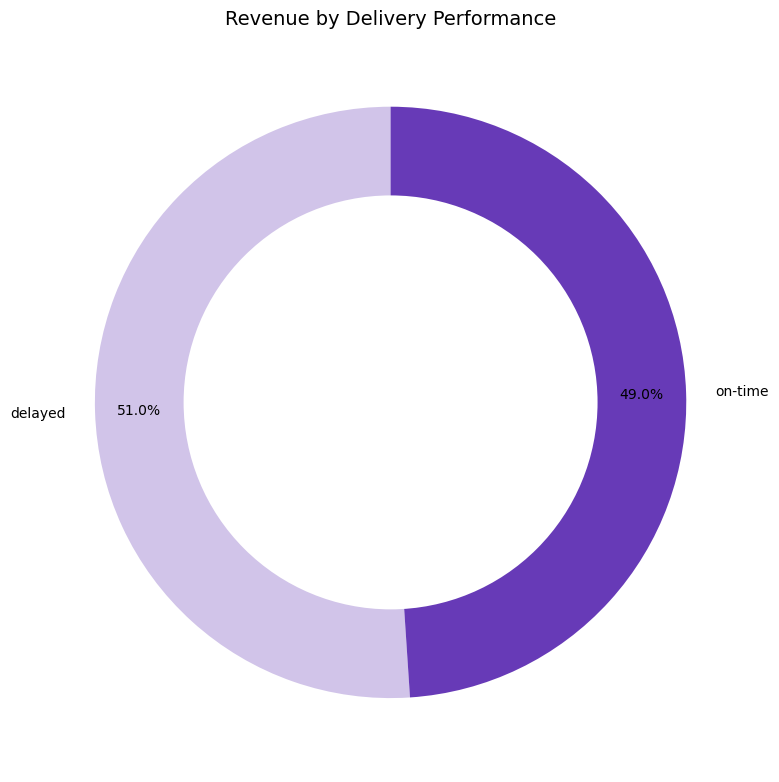

In [195]:
# Doughnut Chart: Evaluating how delivery performanace affects revenue
delivery_analysis = df.groupby('Delivery Performance').agg({
    'Revenue': 'mean',
}).reset_index()
plt.figure(figsize=(8, 8))
labels = delivery_analysis['Delivery Performance']
sizes = delivery_analysis['Revenue']
colors = ['#D1C4E9', '#673AB7']  # Shades of purple
plt.pie(
    sizes,
    labels=labels,
    colors=colors[:len(labels)],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Revenue by Delivery Performance', fontsize=14)
plt.tight_layout()
plt.show()

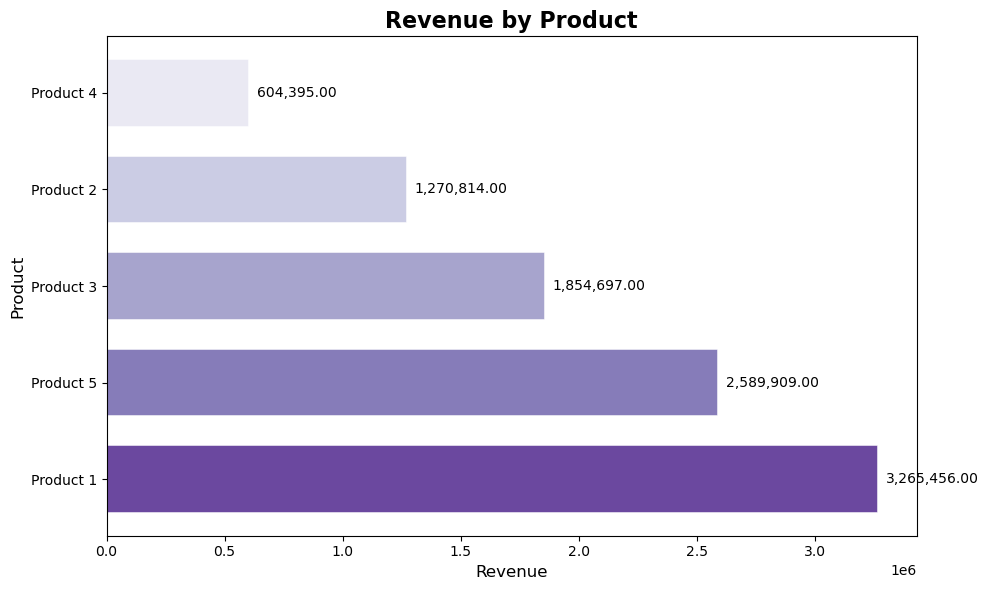

In [197]:
# Find revenue by product
product_performance = (
    df.groupby('Product')
    .agg({'Revenue': 'sum'})
    .reset_index()
    .sort_values(by='Revenue', ascending=True)
)
palette = sns.color_palette("Purples", len(product_performance)) # Define a purple color palette
plt.figure(figsize=(10, 6)) 
bars = plt.barh(
    product_performance['Product'], 
    product_performance['Revenue'], 
    color=palette, 
    edgecolor="white", 
    height=0.7, 
    alpha=0.9,  
    linewidth=1.2 
)
for bar in bars:
    plt.text(
        bar.get_width() + max(product_performance['Revenue']) * 0.01,  # Slightly offset to the right
        bar.get_y() + bar.get_height() / 2,  # Center vertically
        f"{bar.get_width():,.2f}",  # Format the value
        va='center', 
        fontsize=10, 
        color="black"
    )
plt.title("Revenue by Product", fontsize=16, weight="bold")
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

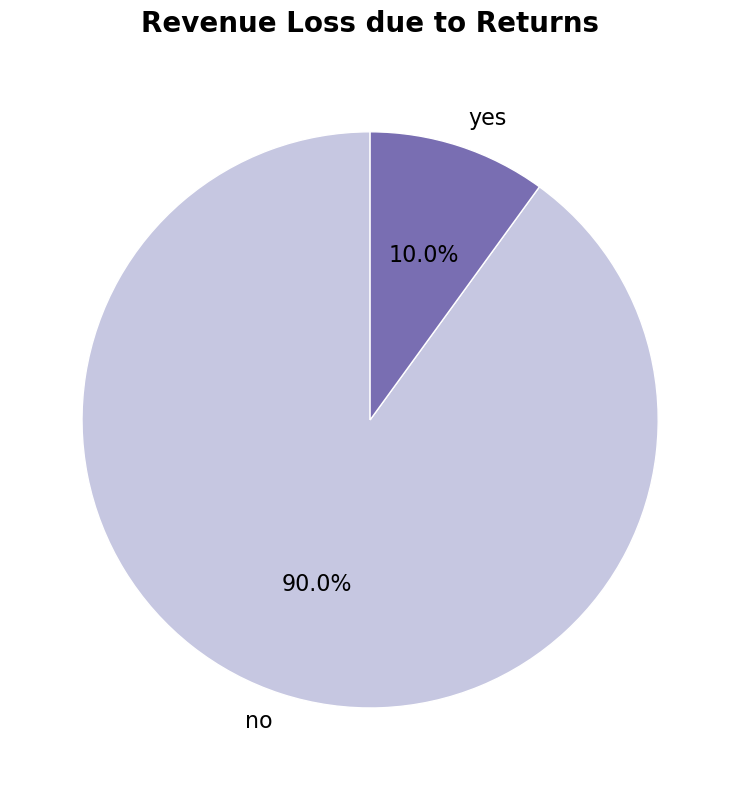

In [205]:
# Impact of returns
return_analysis = df.groupby('Return').agg({'Revenue': 'sum'})
palette = sns.color_palette("Purples", len(return_analysis))
plt.figure(figsize=(8, 8))
plt.pie(
    return_analysis['Revenue'], 
    labels=return_analysis.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=palette, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}, 
    textprops={'fontsize': 16}
)
plt.title("Revenue Loss due to Returns", fontsize=20, weight="bold", pad=20)
plt.tight_layout()
plt.show()

<div style="text-align: justify; font-size: 20px; color: purple; font-family: Garamond; font-weight: bold">
   INSIGHTS AND RECOMMENDATIONS
</div>
<div style="text-align: justify; font-size: 16px; color: #000000; font-family: Garamond;">
    Based on the analysis, the following insights were derived: <br>
    The histogram titled "Revenue Distribution" shows that the majority of revenue values fall within the range of 500 to 1000. The count of revenue values decreases as the revenue increases, indicating that higher revenue values are less frequent. This distribution suggests that while there are some high-revenue instances, most of the revenue values are concentrated in the lower range. The density plot superimposed on the histogram provides a smooth representation of this distribution, highlighting the peak around the 500 to 1000 range. <br>
    
The bar chart titled "Units Sold Distribution" shows that the majority of units sold fall within the range of 1 to 10 units. Each bar represents the count of units sold for each unit value, with counts approximately between 500 and 600. The smooth line overlaying the bars represents a density estimate of the distribution, highlighting the frequency of different unit quantities sold. This chart provides a visual representation of sales patterns, indicating that most sales involve smaller quantities of units. <br>

The line graphs shows fluctuations in monthly revenue from January 2017 to January 2020 and corresponding sales which correlates based on the shape of the lines. The highest point is around mid-2017, while the lowest point is around mid-2019. This graph highlights periods of significant revenue increase and decrease, providing insights into seasonal trends and potential factors affecting revenue over time. <br>

The density plot provides insights into how different customer acquisition methods contribute to revenue. The plot shows that the majority of revenue for all acquisition types (Ad, Returning, and Organic) is concentrated between 0 and 2000, with a peak around 1000. The density decreases as revenue increases, with very few instances of revenue above 4000. This visual comparison highlights the similarities and differences in revenue patterns among the three acquisition types, suggesting that while all methods generate revenue, they do so at varying levels of efficiency and frequency. <br>

The analysis shows the revenue figures for seven states: Tennessee, North Carolina, Alabama, Mississippi, Georgia, Florida, and South Carolina. South Carolina has the highest revenue, while Tennessee has the lowest among the listed states. <br>

The analysis also shows the revenue generated by the five different products. Product 1 leads with the highest revenue of 3,265,456.00, followed by Product 5 with 2,589,909.00. Product 4 has the lowest revenue at 604,395.00. <br>

The pie chart shows that 10% of revenue received was lost due to returned items. <br>

Here are the recommendations: <br>
Based on the insights derived, it is recommended to focus on strategies that maximize revenue in the high-performing areas while addressing the gaps identified. Specifically, efforts should be directed toward enhancing sales of lower-revenue products, such as Product 4, by analyzing customer preferences and optimizing marketing strategies for these items. Additionally, the significant revenue lost due to returned items (10%) highlights the need to review return policies, improve product quality, and enhance customer satisfaction to reduce returns. Seasonal trends observed in the revenue fluctuations suggest opportunities to implement targeted promotional campaigns during low-revenue periods and capitalize on peak seasons. Furthermore, since smaller unit sales dominate the distribution, introducing incentives for bulk purchases could boost revenue. Lastly, optimizing customer acquisition methods by investing in the most effective channels and improving underperforming ones, particularly those contributing less efficiently to revenue, can lead to a more balanced and profitable acquisition strategy.

    
</div>